# Intro

This is a tutorial on using my Python wrapper for the listing scraper api API which enbales users to download pricing information from major ticket exchanges.

In [1]:
from listing_scraper import st

import pandas as pd
import numpy as np
import altair as al
al.themes.enable('dark') # set dark theme


ThemeRegistry.enable('dark')

# Single event
To download listings for a single event use `get_listings` function which requires `eventid`. Lets get listings for the Nets at Lakers game on Novermber 13th 2022. You can find the event id in the event url on the stubhub website. 

In [2]:
listings = st.get_listings(150339062)
listings[0]

{'RatingMessage': None,
 'RatingValue': 0.0,
 'Id': 5585903857,
 'EventId': 150339062,
 'CssPostFix': 'blue',
 'TraderType': None,
 'Section': '321',
 'SectionId': 1132944,
 'SectionMapName': '',
 'RowMapName': '$r',
 'Row': '9',
 'Price': '$88',
 'PriceWithFees': '',
 'RawPrice': 88.2,
 'QuantityRange': '2',
 'IsAlreadySold': False,
 'IsAlreadySoldTicketClass': None,
 'LastInSectionString': None,
 'LastInSectionDescriptionString': None,
 'AboutToSellOut': None,
 'AboutToSellOutExplanation': None,
 'NumberOfTicketsString': None,
 'AdmitXTicketsString': None,
 'TicketsLeftInListingMessage': None,
 'ShowNumberOfTicketsString': False,
 'LastTicketsInSectionMessage': {'Message': None,
  'Qualifier': None,
  'Disclaimer': None,
  'HasValue': False,
  'FeatureTrackingKey': None},
 'NumberOfTicketsDisplayed': None,
 'WillBeAnimated': True,
 'LocationRank': 0.0,
 'ListingRank': 0.0,
 'PriceRank': 0.0,
 'SectionColor': None,
 'HasBestValue': False,
 'IsPromotedListing': False,
 'SwapMapInTile':

In [3]:
# Number of listings
len(listings)

1196

`listings` is a list of dictionaries one of which you can see above. You can convert it to a dataframe and save as a csv.

In [4]:
listings = pd.DataFrame(listings)
listings.head()
# listings.to_csv('SpursvsWarriors 2018-3-19.csv')

,RatingMessage,RatingValue,Id,EventId,CssPostFix,TraderType,Section,SectionId,SectionMapName,RowMapName,...,HasSpecialNotes,IsExpertChoice,IsStandardTicket,FaceValueMessage,SellerTrackingKey,FvTrackingKey,InvalidSeatsTrackingKey,TraderIconMessage,ConnectedSellerIconMessage,SeatDetailsIcon
0,None,0.0,5585903857,150339062,blue,None,321,1132944.0,,$r,...,False,False,False,None,None,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
1,None,0.0,5625874292,150339062,,None,LOT C,NaN,,$r,...,True,False,False,None,e205966f-497c-4d4f-b5f6-6be10d8e63ba,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
2,None,0.0,5575812063,150339062,,None,PARKINGING,NaN,,$r,...,True,False,False,None,e205966f-497c-4d4f-b5f6-6be10d8e63ba,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
3,None,0.0,5583031600,150339062,,None,PARKING,NaN,,$r,...,True,False,False,None,e205966f-497c-4d4f-b5f6-6be10d8e63ba,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
4,None,0.0,5597298927,150339062,blue,None,332,1132955.0,s332,$r,...,True,False,False,None,None,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."


## Multiple events
To download listings for multiple events use `get_listings_by_event` function that takes the `events` parameter which is a pandas dataframe with event name and id in the following format.

Let's get listings for some of the Nets home games in 2022-2023 season.

In [5]:
events =[150339062,150339757,150341276,150337701,150341823,150339062]
res = st.get_listings(events)


In [7]:
df = pd.concat([pd.DataFrame(r) for r in res])
df.head()

,RatingMessage,RatingValue,Id,EventId,CssPostFix,TraderType,Section,SectionId,SectionMapName,RowMapName,...,HasSpecialNotes,IsExpertChoice,IsStandardTicket,FaceValueMessage,SellerTrackingKey,FvTrackingKey,InvalidSeatsTrackingKey,TraderIconMessage,ConnectedSellerIconMessage,SeatDetailsIcon
0,None,0.0,5585903857,150339062,blue,None,321,1132944.0,,$r,...,False,False,False,None,None,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
1,None,0.0,5625874292,150339062,,None,LOT C,NaN,,$r,...,True,False,False,None,e205966f-497c-4d4f-b5f6-6be10d8e63ba,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
2,None,0.0,5585358384,150339062,blue2,None,PR02,1504155.0,,$r,...,False,False,False,None,None,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
3,None,0.0,5575812063,150339062,,None,PARKINGING,NaN,,$r,...,True,False,False,None,e205966f-497c-4d4f-b5f6-6be10d8e63ba,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."
4,None,0.0,5583031600,150339062,,None,PARKING,NaN,,$r,...,True,False,False,None,e205966f-497c-4d4f-b5f6-6be10d8e63ba,None,None,"{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim...","{'Message': None, 'Qualifier': None, 'Disclaim..."


In [2]:
save_loc = 'example_multiple_events.json'
# df.to_json(save_loc, orient='records')
df = pd.read_json(save_loc)

In [4]:
pd.unique(df['EventId'])

array([150339062, 150339757, 150341276, 150337701, 150341823])

In [5]:
avg_price = pd.pivot_table(df, values='RawPrice', index=['EventId'], aggfunc=np.mean)
avg_price

,RawPrice
EventId,
150337701,333.957932
150339062,526.352839
150339757,143.927185
150341276,242.654522
150341823,304.837251


<AxesSubplot:title={'center':'Average listing price by Event'}, ylabel='EventId'>

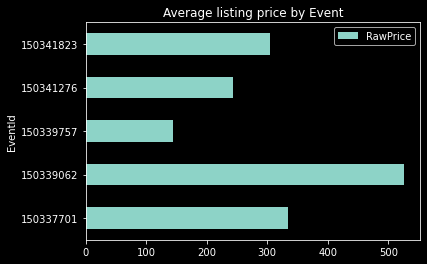

In [75]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
style.use('dark_background')

avg_price.plot.barh(title='Average listing price by Event')

Let's also look at the number of listings.

<AxesSubplot:title={'center':'Number of listings by Event'}, ylabel='EventId'>

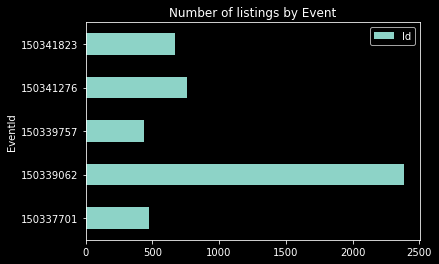

In [19]:
listings_number = pd.pivot_table(df, values='Id', index=['EventId'], aggfunc=len)
listings_number.plot.barh(title='Number of listings by Event')

Below is a good visual to see how spread out the prices by event are.

array([[<AxesSubplot:title={'center':'150337701'}>,
        <AxesSubplot:title={'center':'150339062'}>],
       [<AxesSubplot:title={'center':'150339757'}>,
        <AxesSubplot:title={'center':'150341276'}>],
       [<AxesSubplot:title={'center':'150341823'}>, <AxesSubplot:>]],
      dtype=object)

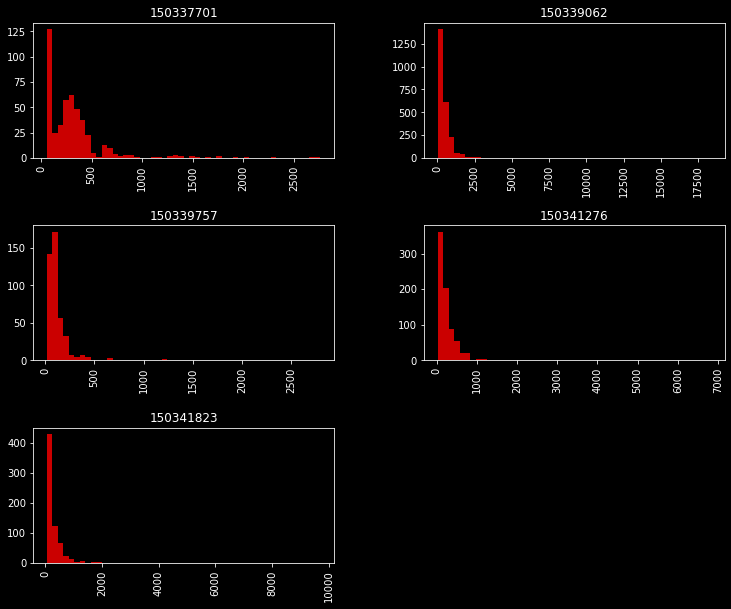

In [76]:
# Histogram of Ticket Prices by Event
df['RawPrice'].hist(by=df['EventId'],alpha=0.8,bins=50,figsize=(12,10),color='red')


## Heatmap

In [3]:
def sort_mixed_list(lst):
    # sort mixed list
    ret = []
    for i in lst:
        try:
            ret.append(int(i))
        except:
            ret.append(str(i))
    ret = sorted(ret, key=lambda x: (isinstance(x, str), x))
    return [str(i) for i in ret]


df = df.loc[(df['EventId']==150339062),:] # pick single event

In [4]:
heat_data = df[~df.Section.str.contains('PR')] \
        .groupby(['Section','Row']) \
        .agg({'RawPrice': 'mean',
              'QuantityRange': lambda x: sum([int(a[-1]) for a in x.str.split('-')])}) \
        .reset_index()
heat_data['W_Avg_Price'] = heat_data['RawPrice']*heat_data['QuantityRange']/heat_data['QuantityRange'].sum()
heat_data

,Section,Row,RawPrice,QuantityRange,W_Avg_Price
0,101,1,1972.196667,14,4.886859
1,101,10,873.931111,38,5.877767
2,101,11,661.980000,4,0.468658
3,101,12,686.480000,232,28.188205
4,101,13,836.275000,18,2.664239
...,...,...,...,...,...
584,C42,,230.300000,14,0.570655
585,C43,,230.780000,24,0.980304
586,CRT,1,11645.546667,16,32.978539
587,Loge Level 104,14,445.500000,4,0.315398


In [6]:
al.renderers.enable('jupyterlab')

heat_chart = al.Chart(heat_data, title=f'Avg Price by Section and Row for Event {150339062}').mark_rect().encode(
    x=al.X('Row', title=None, sort=sort_mixed_list(df['Row'].unique()), axis=al.Axis(orient="top",labelAngle=-45)),
    y=al.Y('Section', title=None, sort=sort_mixed_list(df['Section'].unique())),
    color=al.Color('W_Avg_Price', scale=al.Scale(type='log',scheme='greenblue')),
    tooltip=['Section','Row','QuantityRange',al.Tooltip('RawPrice', format="$.0f")]
).properties(
    width=750,
    height=1000
)
# add colored labels 
text = heat_chart.mark_text(size=9).encode(
    al.Text('RawPrice:Q', format="$.0f"))

heat_chart.configure(background='black')


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
